In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo CSV
df = pd.read_csv('list_attr_celeba.csv')

In [3]:
# Visualizar las primeras filas del DataFrame
print(df.head())

     image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  We

In [4]:
# Calcular el porcentaje de presencia de cada característica
presence_percentages = df.drop(columns=['image_id']).apply(lambda x: (x == 1).mean() * 100)

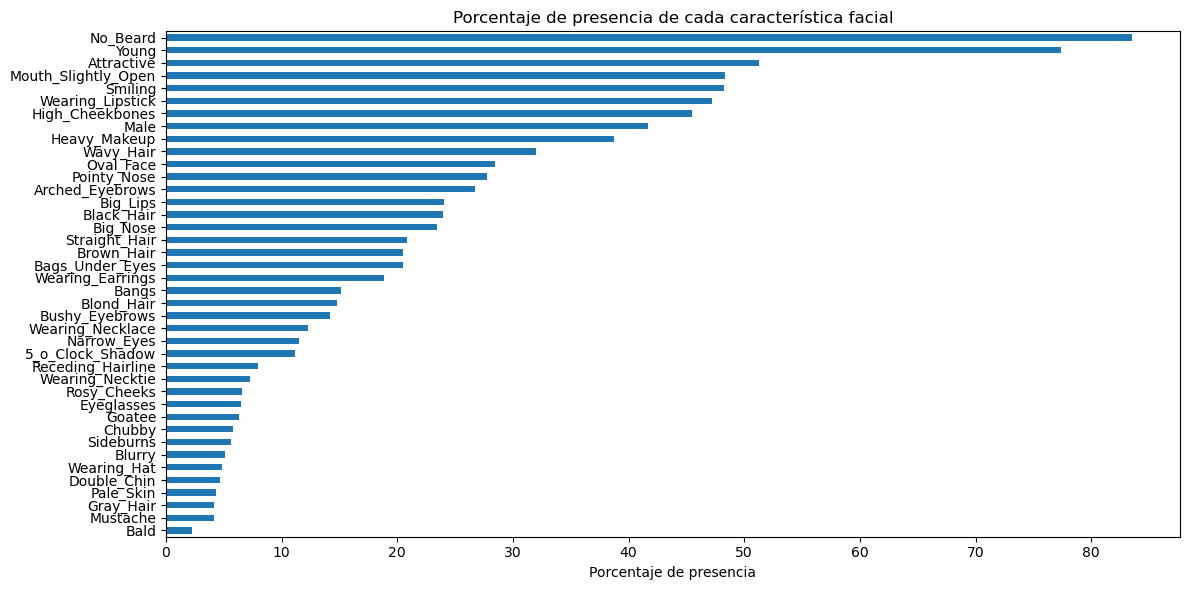

In [5]:
# Visualizar el porcentaje de presencia de cada característica
plt.figure(figsize=(12, 6))
presence_percentages.sort_values().plot(kind='barh')
plt.xlabel('Porcentaje de presencia')
plt.title('Porcentaje de presencia de cada característica facial')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

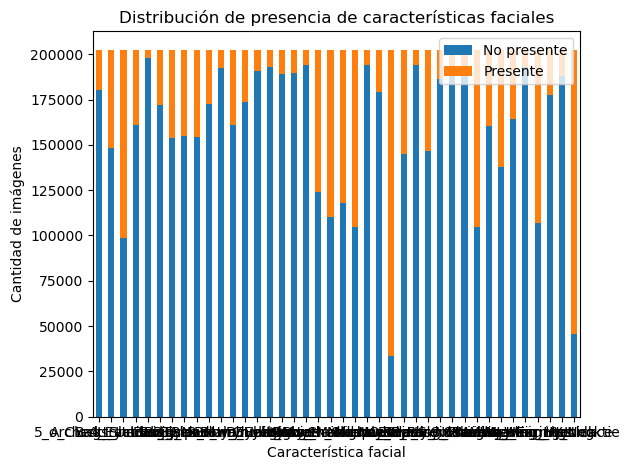

In [6]:
# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
presence_counts = df.drop(columns=['image_id']).apply(lambda x: (x == 1).value_counts())
presence_counts.T.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.xlabel('Característica facial')
plt.ylabel('Cantidad de imágenes')
plt.title('Distribución de presencia de características faciales')
plt.legend(['No presente', 'Presente'], loc='upper right')
plt.tight_layout()
plt.show()

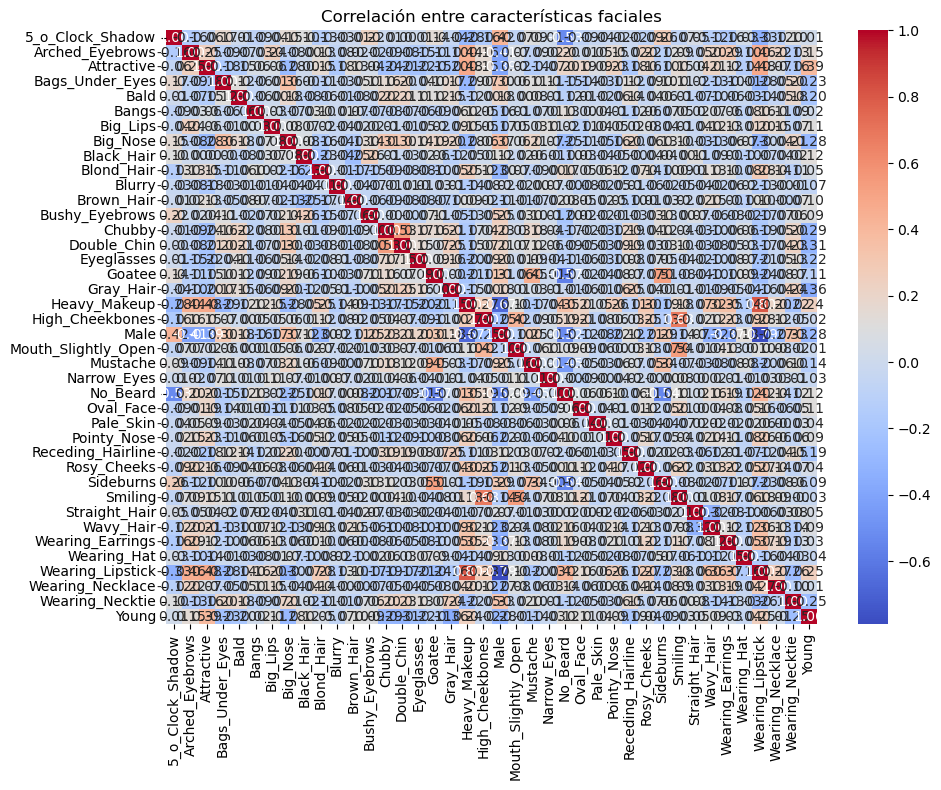

In [7]:
# Análisis de patrones
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['image_id']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre características faciales')
plt.tight_layout()
plt.show()

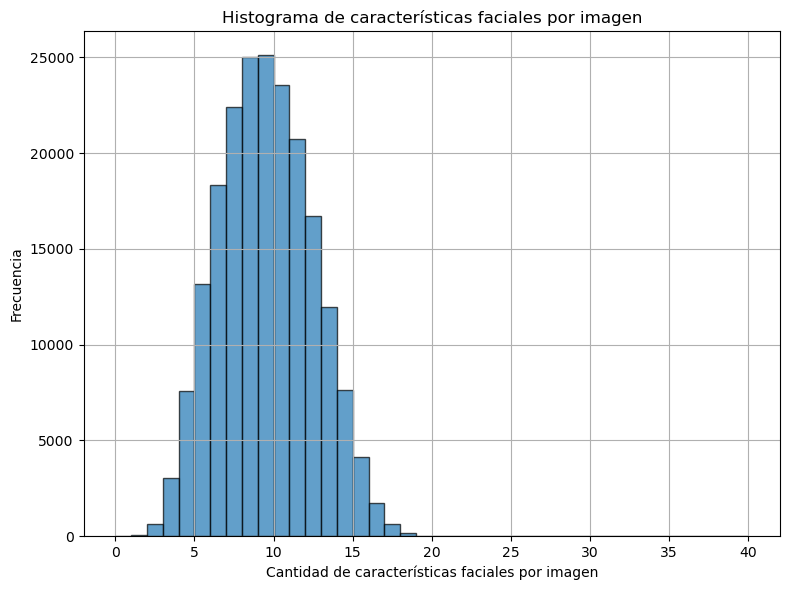

In [8]:
# Histograma de características por imagen
df['total_features'] = df.drop(columns=['image_id']).apply(lambda x: (x == 1).sum(), axis=1)
plt.figure(figsize=(8, 6))
plt.hist(df['total_features'], bins=range(0, 41), edgecolor='black', alpha=0.7)
plt.xlabel('Cantidad de características faciales por imagen')
plt.ylabel('Frecuencia')
plt.title('Histograma de características faciales por imagen')
plt.grid(True)
plt.tight_layout()
plt.show()